## RTI Center for Data Science - Exercise 2

Hello again! This is my first exploration into Exercise 2. In brief, this is an open-ended exercise utilizing data on aviation accidents from the National Transportation Safety Board (as always, the README.md file has a much more in-depth explanation of the goals of this exercise).

There are two types of data involved in this exercise (both in the *data* folder): an XML file full of data straight from the NTSB website, and a series of JSON files (corresponding to the Event IDs from the XML file) with additional textual information about each accident.

The first thing I want to do is import the XML file and a JSON file (or two), so I can get a feel for the data I'll be working with. Unfortunately, pandas doesn't have in-built support for importing XML files, so I'll need to do some work to get my data into a nice DataFrame.

In [1]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
tree = ET.parse('data/AviationData.xml')
root = tree.getroot()
root2 = root[0] # for some reason, there is an extra "parent" here

In [2]:
columns = pd.DataFrame.from_dict(root2[0].attrib, orient='index').transpose().columns

data = pd.DataFrame.from_dict(list(map(lambda x:x.attrib,root2)))

data = data.reindex(columns,axis='columns') # for whatever reason, the list/map/lambda above alphabetizes the columns
print(data.shape)
data.head()

(77257, 31)


,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20150901X74304,Accident,GAA15CA244,09/01/2015,"Truckee, CA",United States,,,,,...,,,,,,,,,Preliminary,
1,20150901X92332,Accident,CEN15LA392,08/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,Instructional,,,,,2,VMC,LANDING,Preliminary,09/04/2015
2,20150902X61853,Accident,GAA15CA246,08/30/2015,"New Milford, CT",United States,,,,,...,,,,,,,,,Preliminary,
3,20150901X02521,Accident,GAA15CA243,08/30/2015,"New Enterprise, PA",United States,,,,,...,,,,,,,,,Preliminary,
4,20150831X61356,Accident,GAA15CA242,08/29/2015,"MIDLOTHIAN, TX",United States,,,,,...,,,,,,,,,Preliminary,


In [3]:
# what are our columns?
data.columns

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'AirportCode',
       'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory',
       'RegistrationNumber', 'Make', 'Model', 'AmateurBuilt',
       'NumberOfEngines', 'EngineType', 'FARDescription', 'Schedule',
       'PurposeOfFlight', 'AirCarrier', 'TotalFatalInjuries',
       'TotalSeriousInjuries', 'TotalMinorInjuries', 'TotalUninjured',
       'WeatherCondition', 'BroadPhaseOfFlight', 'ReportStatus',
       'PublicationDate'],
      dtype='object')

In [4]:
# what does a row look like?
print(data.loc[1,:])

EventId                            20150901X92332
InvestigationType                        Accident
AccidentNumber                         CEN15LA392
EventDate                              08/31/2015
Location                              Houston, TX
Country                             United States
Latitude                                29.809444
Longitude                              -95.668889
AirportCode                                   IWS
AirportName                          WEST HOUSTON
InjurySeverity                          Non-Fatal
AircraftDamage                        Substantial
AircraftCategory                         Airplane
RegistrationNumber                         N452CS
Make                                       CESSNA
Model                                        T240
AmateurBuilt                                   No
NumberOfEngines                                  
EngineType                                       
FARDescription          Part 91: General Aviation


### Exploring XML data
What are some interesting questions I can ask with these data?
* Are accidents becoming more or less frequent over time?
* How does weather affect accidents?
* What are the typical number of fatalities/injuries in an accident?

Unfortunately, what I *don't* have here is any data on flights without accidents, so I need to be really careful with any conclusions I come to. Ultimately, I can't say anything about features of flights that make accidents more or less likely. I can, however, make statements about what features are more or less common amongst flights that did result in an accident.

For example, what are the distributions of fatal, serious, and minor injuries accross these flights?

In [5]:
injuries = pd.DataFrame()
injuries['Fatal'] = data['TotalFatalInjuries'].astype(str).replace('',np.nan).astype(float)
injuries['Serious'] = data['TotalSeriousInjuries'].astype(str).replace('',np.nan).astype(float)
injuries['Minor'] = data['TotalMinorInjuries'].astype(str).replace('',np.nan).astype(float)
injuries['Uninjured'] = data['TotalUninjured'].astype(str).replace('',np.nan).astype(float)

              Fatal       Serious         Minor     Uninjured
count  55791.000000  53744.000000  54733.000000  65862.000000
mean       0.788962      0.309895      0.492555      5.716817
std        6.087442      1.368488      2.779814     29.052413
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      1.000000
75%        1.000000      0.000000      1.000000      2.000000
max      349.000000    111.000000    380.000000    699.000000


Text(0,0.5,'Cumulative Probability')

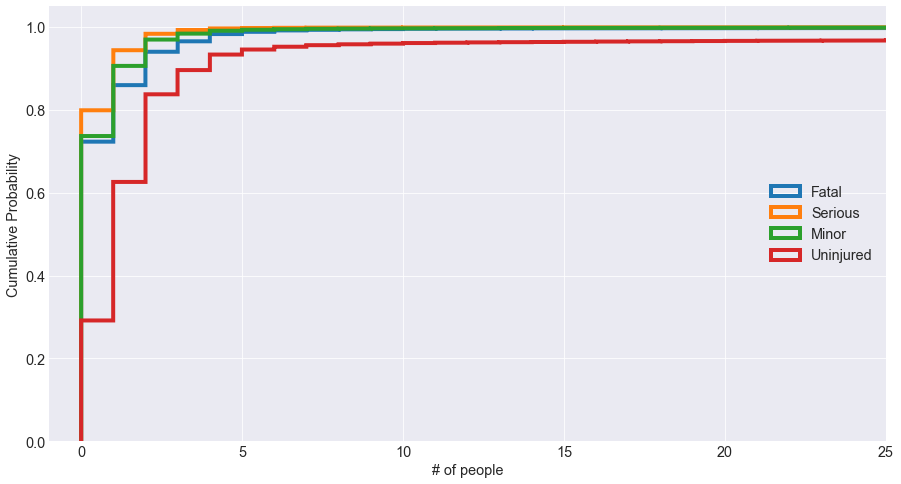

In [6]:
print(injuries.describe())

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

_, ax = plt.subplots(figsize=(15,8))
ax.set_xlim([-1,25])
injuries.Fatal.hist(cumulative=True, normed=1, bins=len(injuries), histtype='step', ax=ax, linewidth=4)
injuries.Serious.hist(cumulative=True, normed=1, bins=len(injuries), histtype='step', ax=ax, linewidth=4)
injuries.Minor.hist(cumulative=True, normed=1, bins=len(injuries), histtype='step', ax=ax, linewidth=4)
injuries.Uninjured.hist(cumulative=True, normed=1, bins=len(injuries), histtype='step', ax=ax, linewidth=4)
ax.legend(list(injuries.columns), loc='right')
ax.set_xlabel('# of people')
ax.set_ylabel('Cumulative Probability')

Good news! Even when accidents do occur, ~75% have no fatalities!

### Importing JSON text data

Now I'll go ahead and import the "narrative" data for 144 of the flights, which are stored in JSON files. First, I'll just load in one of them to check it out, then I'll batch import all of them.

In [7]:
import glob
JSON_files = glob.glob('./data/*.json')
JSON_test = pd.read_json(JSON_files[0], orient='split')
JSON_test

,EventId,narrative,probable_cause
0,20070804X01107,NTSB investigators may not have traveled in su...,the pilot's failure to maintain clearance with...
1,20001208X09357,NTSB investigators either traveled in support ...,The pilot's failure to maintain adequate airsp...
2,20001212X23867,NTSB investigators may not have traveled in su...,FAILURE OF THE FREE TURBINE INTERMEDIATE PINIO...
3,20001214X37502,NTSB investigators may not have traveled in su...,
4,20001206X02609,NTSB investigators either traveled in support ...,Improper loading of the airplane. Contributin...
5,20001211X14610,THE ACCIDENT AIRPLANE SUSTAINED A COMPLETE LO...,THE PILOT'S IMPROPER PREFLIGHT PLANNING/PREPA...
6,20001214X36086,NTSB investigators may not have traveled in su...,
7,20001212X18967,The foreign authority was the source of this i...,
8,20060814X01163,NTSB investigators used data provided by vario...,The pilot inadvertently pulled back on the cyc...
9,20111003X42104,NTSB investigators used data provided by vario...,The pilot's failure to maintain directional co...


In [8]:
print(JSON_test.loc[0].EventId)
print(JSON_test.loc[0].narrative)
print(JSON_test.loc[0].probable_cause)

20070804X01107
NTSB investigators may not have traveled in support of this investigation and used data provided by various sources to prepare this public aircraft accident report.The accident occurred while the helicopter was supporting firefighting efforts with long-line operations. Two days prior to the accident, the division group supervisor (DIVS) anchored a colored reflective panel used for indicating landing and drop zones at the accident location.  The DIVS stated that no site assessment was performed at the time of the panel placement because the placement was not intended to be the indicator of the drop zone for blivet deliveries.  The terrain in the area consisted of steep slopes and trees varying in height from 75 to 200 feet.  One day prior to the accident, the location of the panel was not changed from the previous day and remained as placed by the DIVS.  The accident helicopter, equipped with a 150-foot-long line, then made the blivet drop within 3 feet of the panel.  The

Okay, so it looks like we actually have narrative information for all of our accidents! Great!

In [9]:
# load in all JSON data

json_data = pd.concat(list(map(lambda x: pd.read_json(x, orient='split'), JSON_files)))
print(json_data.shape)
json_data.head()

(76133, 3)


,EventId,narrative,probable_cause
0,20070804X01107,NTSB investigators may not have traveled in su...,the pilot's failure to maintain clearance with...
1,20001208X09357,NTSB investigators either traveled in support ...,The pilot's failure to maintain adequate airsp...
2,20001212X23867,NTSB investigators may not have traveled in su...,FAILURE OF THE FREE TURBINE INTERMEDIATE PINIO...
3,20001214X37502,NTSB investigators may not have traveled in su...,
4,20001206X02609,NTSB investigators either traveled in support ...,Improper loading of the airplane. Contributin...


In [10]:
# it looks like there are ~1000 fewer narrative than accident reports, but that shouldn't be an issue when I merge

all_data = data.merge(json_data, how='left', on='EventId')
all_data.head()

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate,narrative,probable_cause
0,20150901X74304,Accident,GAA15CA244,09/01/2015,"Truckee, CA",United States,,,,,...,,,,,,,Preliminary,,,
1,20150901X92332,Accident,CEN15LA392,08/31/2015,"Houston, TX",United States,29.809444,-95.668889,IWS,WEST HOUSTON,...,,,,2,VMC,LANDING,Preliminary,09/04/2015,"On August 31, 2015, about 1230 central dayligh...",
2,20150902X61853,Accident,GAA15CA246,08/30/2015,"New Milford, CT",United States,,,,,...,,,,,,,Preliminary,,,
3,20150901X02521,Accident,GAA15CA243,08/30/2015,"New Enterprise, PA",United States,,,,,...,,,,,,,Preliminary,,,
4,20150831X61356,Accident,GAA15CA242,08/29/2015,"MIDLOTHIAN, TX",United States,,,,,...,,,,,,,Preliminary,,,
